 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
!pip install torchvision

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import torch
import torchvision
from torchvision import transforms
from tqdm import notebook # это для прогресс-баров

Скачаем обучающую и контрольную выборки.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform);
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2);

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform);
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2);

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!




/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
<Ваш код здесь (может занимать много ячеек)> 

In [ ]:
# Сколько картинок в train?
print('Колическтво картинок в train - ', trainset.data.shape[0])

Колическтво картинок в train -  60000


In [ ]:
# Сколько картинок в test?
print('Колическтво картинок в test - ', testset.data.shape[0])

Колическтво картинок в test -  10000


In [ ]:
# Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем train_data у переменной trainset)?
from collections import Counter

targets_list = list(trainset.targets.numpy())
count_classes_train = Counter()
for target in targets_list:
  count_classes_train[target] += 1
count_classes_train

Counter({0: 6000,
         1: 6000,
         2: 6000,
         3: 6000,
         4: 6000,
         5: 6000,
         6: 6000,
         7: 6000,
         8: 6000,
         9: 6000})

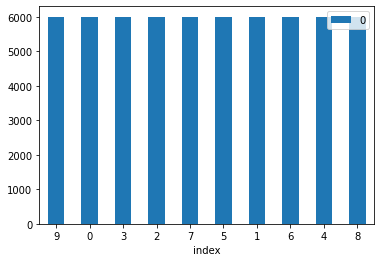

In [ ]:
import pandas as pd
df_train = pd.DataFrame.from_dict(data = count_classes_train, orient='index').reset_index()
df_train.plot.bar(x='index', y=0, rot=0)

**Количество объектов разных классов в train датасете распределено равномерно.**

In [ ]:
# Равномерно ли распределено количество объектов разных классов в test?
targets_list = list(testset.targets.numpy())
count_classes_test = Counter()
for target in targets_list:
  count_classes_test[target] += 1
count_classes_test

Counter({0: 1000,
         1: 1000,
         2: 1000,
         3: 1000,
         4: 1000,
         5: 1000,
         6: 1000,
         7: 1000,
         8: 1000,
         9: 1000})

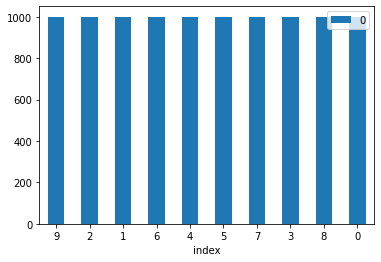

In [ ]:
df_test = pd.DataFrame.from_dict(data = count_classes_test, orient='index').reset_index()
df_test.plot.bar(x='index', y=0, rot=0)

**Количество объектов разных классов в test датасете распределено равномерно.**

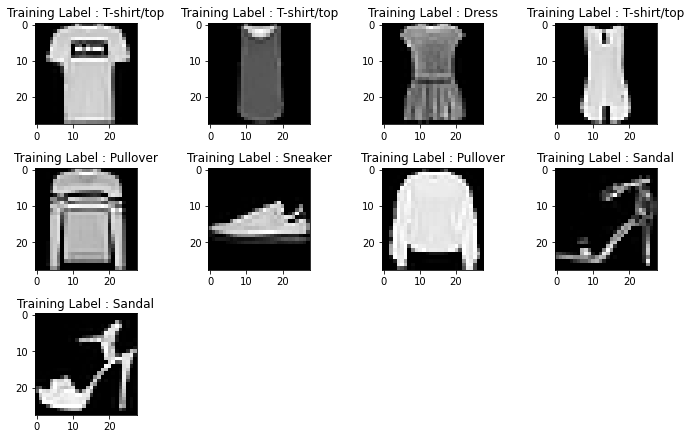

In [ ]:
# Выведите несколько картинок с помощью pyplot
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % classes[trainset.targets[i]])
plt.show()

# MLP

In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
# 1. Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 16)
        self.fc5 = nn.Linear(16, 10)
        

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x


MLP_network = MLP()

In [ ]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(MLP_network.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 10
total_step = len(trainloader)
Loss_mlp = []
print('Врямя начала обучения',datetime.now())
print('----------------------------------------------------')
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # получаем данные
        inputs, labels = data

        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = MLP_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выведем качество
        running_loss += loss.item()
        
    print('Epoch {}  | Loss : {:.4f}'.format(epoch+1, running_loss / total_step))        
    print('----------------------------------------------------')
    Loss_mlp.append(running_loss / total_step)
print('Finished Training')
print('Врямя окончания обучения',datetime.now())

Врямя начала обучения 2020-12-10 23:18:27.364115
----------------------------------------------------
Epoch 1  | Loss : 0.5429
----------------------------------------------------
Epoch 2  | Loss : 0.3948
----------------------------------------------------
Epoch 3  | Loss : 0.3602
----------------------------------------------------
Epoch 4  | Loss : 0.3462
----------------------------------------------------
Epoch 5  | Loss : 0.3292
----------------------------------------------------
Epoch 6  | Loss : 0.3211
----------------------------------------------------
Epoch 7  | Loss : 0.3143
----------------------------------------------------
Epoch 8  | Loss : 0.3094
----------------------------------------------------
Epoch 9  | Loss : 0.3019
----------------------------------------------------
Epoch 10  | Loss : 0.2999
----------------------------------------------------
Finished Training
Врямя окончания обучения 2020-12-11 00:09:39.502946


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in trainloader:
        images, labels = data
        y_pred = MLP_network(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
print('MLP. Accuracy для каждого класса')
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

MLP. Accuracy для каждого класса
Accuracy of T-shirt/top : 93 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 89 %
Accuracy of Dress : 94 %
Accuracy of  Coat : 76 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 54 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 92 %


# CNN

In [ ]:
# 2. Свёрточная сеть, классифицирующая этот датасет
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class SimpleConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора родителя
        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=196, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=196, out_channels=98, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=98, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=3)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=16, kernel_size=1)
        self.fc1 = nn.Linear(16*1*1, 120)  # см. примечание ниже
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 48)
        self.fc4 = nn.Linear(48, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        #print(x.shape)
        x = x.view(-1, 16*1*1)  #  см. примечание ниже
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
# объявляем сеть
netCNN = SimpleConvNet()

# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()
Loss_cnn = []

# выбираем алгоритм оптимизации и learning_rate
optimizer = torch.optim.Adam(netCNN.parameters(), lr=0.0001)

In [ ]:
print('Врямя начала обучения',datetime.now())
Loss_cnn = []
# итерируемся
for epoch in notebook.tqdm(range(4)):

    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        
        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = netCNN(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            Loss_cnn.append(running_loss/ 2000)
            running_loss = 0.0

print('Обучение закончено')

print('Врямя окончания обучения',datetime.now())


Врямя начала обучения 2020-12-11 00:14:04.485454


[1,  2000] loss: 1.171
[1,  4000] loss: 0.763
[1,  6000] loss: 0.663
[1,  8000] loss: 0.640
[1, 10000] loss: 0.597
[1, 12000] loss: 0.547
[1, 14000] loss: 0.507



[2,  2000] loss: 0.466
[2,  4000] loss: 0.442
[2,  6000] loss: 0.439
[2,  8000] loss: 0.427
[2, 10000] loss: 0.402
[2, 12000] loss: 0.395
[2, 14000] loss: 0.387



[3,  2000] loss: 0.369
[3,  4000] loss: 0.361
[3,  6000] loss: 0.347
[3,  8000] loss: 0.336
[3, 10000] loss: 0.350
[3, 12000] loss: 0.323
[3, 14000] loss: 0.317



[4,  2000] loss: 0.318
[4,  4000] loss: 0.303
[4,  6000] loss: 0.302
[4,  8000] loss: 0.293
[4, 10000] loss: 0.301
[4, 12000] loss: 0.290
[4, 14000] loss: 0.299


Обучение закончено
Врямя окончания обучения 2020-12-11 00:57:50.284759


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in trainloader:
        images, labels = data
        y_pred = netCNN(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
print('CNN. Accuracy для каждого класса на обучающих данных')
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

CNN. Accuracy для каждого класса на обучающих данных
Accuracy of T-shirt/top : 90 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 92 %
Accuracy of Dress : 91 %
Accuracy of  Coat : 79 %
Accuracy of Sandal : 91 %
Accuracy of Shirt : 62 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 96 %


# Accuracy Score

In [ ]:
# 3. Сравните их качество (по графикам лосса и по Accuracy Score)


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = MLP_network(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print('MLP. Accuracy для каждого класса на тестовых данных')
accuracy_mlp = []
for i in range(10):
    accuracy_mlp.append(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

MLP. Accuracy для каждого класса на тестовых данных
Accuracy of T-shirt/top : 90 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 86 %
Accuracy of Dress : 91 %
Accuracy of  Coat : 72 %
Accuracy of Sandal : 97 %
Accuracy of Shirt : 50 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 91 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = netCNN(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
print('CNN. Accuracy для каждого класса на тестовых данных')
accuracy_cnn = []
for i in range(10):
    accuracy_cnn.append(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

CNN. Accuracy для каждого класса на тестовых данных
Accuracy of T-shirt/top : 88 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 90 %
Accuracy of Dress : 89 %
Accuracy of  Coat : 76 %
Accuracy of Sandal : 89 %
Accuracy of Shirt : 58 %
Accuracy of Sneaker : 98 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 94 %


In [ ]:
print('Средняя accuracy MLP', (sum(accuracy_mlp) / len(accuracy_mlp)))
print('Средняя accuracy CNN', (sum(accuracy_cnn) / len(accuracy_cnn)))

Средняя accuracy MLP 87.0
Средняя accuracy CNN 88.12


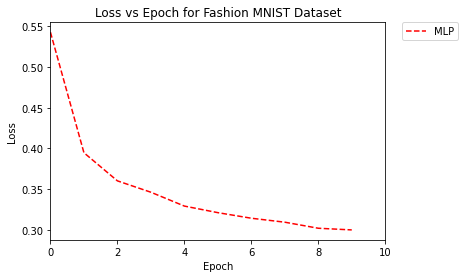

In [ ]:
plt.plot(Loss_mlp, 'r--', label = "MLP")
plt.title("Loss vs Epoch for Fashion MNIST Dataset")
plt.xlim([0, len(Loss_mlp)])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

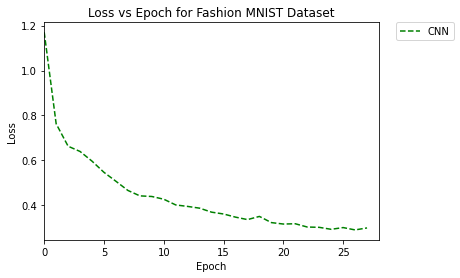

In [ ]:
plt.plot(Loss_cnn, 'g--', label = "CNN")
plt.title("Loss vs Epoch for Fashion MNIST Dataset")
plt.xlim([0, len(Loss_cnn)])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()